# Graph log_count
### Niklas Lantau

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import os
import re

In [119]:
all_files = {}

pdir = r'/home/nlantau/.config/scripts/log_data'

for file in os.listdir(pdir):
    time_stamps = []
    for t in open(pdir + '/' + file):
        time_stamps.append(t.strip())
    all_files[file.replace('2021-','').replace('-','.').rstrip('.log')] = time_stamps
all_files.keys()

dict_keys(['05.17', '05.22', '06.05', '06.11', '06.15', '06.17', '06.01', '06.18', '06.13', '05.15', '05.29', '05.26', '05.13', '06.07', '05.30', '05.27', '05.21', '05.16', '05.31', '06.03', '06.08', '05.09', '05.23', '06.14', '06.06', '05.24', '05.28', '06.12', '05.18', '05.25', '05.12', '06.02', '06.09', '05.10', '05.19', '05.20', '06.10', '05.11', '06.04', '06.16', '05.14'])

In [207]:
x_vals = {5:[], 6:[], 7:[]}
y_vals = []

r1 = re.compile(r'(?P<one>\d+)\.(?P<two>\d+)')

for i in sorted(all_files):
    y_vals.append(len(all_files[i]))
    #print(r1.match(i).group("one"))
    #print(r1.match(i).group("two"))
    x_vals[int(r1.match(i).group("one"))].append(
        (int(r1.match(i).group("two")), len(all_files[i])))
          
    #x_vals[i].append(i)
    #x_vals.append(float(i))
x_vals[5]

[(9, 38),
 (10, 628),
 (11, 675),
 (12, 511),
 (13, 706),
 (14, 560),
 (15, 647),
 (16, 633),
 (17, 688),
 (18, 711),
 (19, 645),
 (20, 648),
 (21, 351),
 (22, 770),
 (23, 327),
 (24, 790),
 (25, 653),
 (26, 479),
 (27, 727),
 (28, 729),
 (29, 251),
 (30, 510),
 (31, 657)]

In [208]:
x_pred = {5:[], 6:[], 7:[]}
x_5 = [x_vals[5][x][0] for x in range(len(x_vals[5]))]
y_5 = [x_vals[5][x][1] for x in range(len(x_vals[5]))]
print(y_5, x_5)
x_pred[5] = np.array(x_5).reshape((-1,1))
y_5 = np.array(y_5).reshape((-1,1))
#x_pred[5]
model_5 = LinearRegression().fit(x_pred[5], y_5)
y_pred = model_5.predict(x_pred[5])
y_pred

[38, 628, 675, 511, 706, 560, 647, 633, 688, 711, 645, 648, 351, 770, 327, 790, 653, 479, 727, 729, 251, 510, 657] [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


array([[551.29347826],
       [553.87944664],
       [556.46541502],
       [559.0513834 ],
       [561.63735178],
       [564.22332016],
       [566.80928854],
       [569.39525692],
       [571.9812253 ],
       [574.56719368],
       [577.15316206],
       [579.73913043],
       [582.32509881],
       [584.91106719],
       [587.49703557],
       [590.08300395],
       [592.66897233],
       [595.25494071],
       [597.84090909],
       [600.42687747],
       [603.01284585],
       [605.59881423],
       [608.18478261]])

ValueError: x and y must be the same size

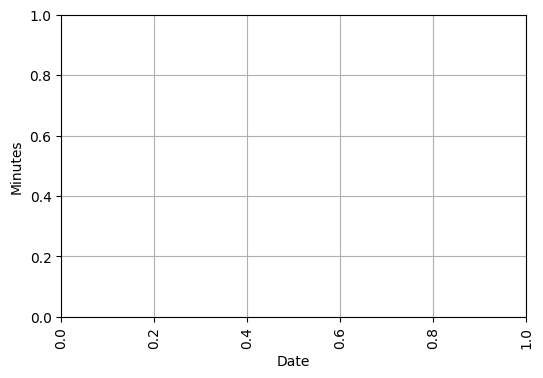

In [205]:
plt.figure(dpi=100)
plt.grid()
plt.xticks(rotation=90)
plt.ylabel('Minutes'); plt.xlabel('Date'); plt.xticks(rotation=90)
plt.scatter(x_vals[5], y_vals)
plt.plot(x_vals, y_vals, 'r--')
plt.plot(x, y_pred, 'g')
plt.tight_layout()

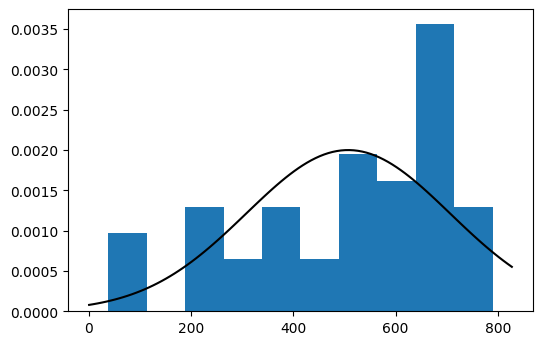

In [45]:
plt.figure(dpi=100)
plt.hist(y_vals, density=True)

# Fitted probability density function
mu, std = norm.fit(y_vals)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k')